# Module 2 Summative Lab

## Introduction

For today's section, we're going to work on a single big lab to apply everything we've learned in Module 2!

## About This Lab

A quick note before getting started--this lab isn't like other labs you seen so far. This lab is meant to take ~8 hours to complete, so it's much longer and more challenging that the average labs you've seen so far. If you feel like this lab is challenging or that you might be struggling a bit, don't fret--that's by design! With everything we've learned about Web Scraping, APIs, and Databases, the best way to test our knowledge of it is to build something substantial! 

## The Project

In this lab, we're going to make use of everything we've learned about APIs, databases, and Object-Oriented Programming to **_Extract, Transform, and Load_** (or **_ETL_**, for short) some data from a SQL database into a MongoDB Database. 

You'll find a database containing information about soccer teams and the matches they've played in the file `database.sqlite`. For this project, our goal is to get the data we think is important from this SQL database, do some calculations and data transformation, and then store everything in a MongoDB database. 

Let's get into the specifics of this project.

### The Goal

Start by examining the data dictionary for the SQL database we'll be working with, which comes from this [kaggle page](https://www.kaggle.com/laudanum/footballdelphi).  Familiarize yourself with the tables it contains, and what each column means. We'll be using this database to get data on each soccer team, calculate some summary statistics, and then store each in a MongoDB database. 

Upon completion of this lab, each unique team in this dataset should have a record in the MongoDB instance containing the following information:

* The name of the team
* The total number of goals scored by the team during the 2011 season
* The total number of wins the team earned during the 2011 season
* A histogram visualization of the team's wins and losses for the 2011 season (store the visualization directly)
* The team's win percentage on days where it was raining during games in the 2011 season. 

#### Getting the Weather Data

Note that for this last calculation, you'll need to figure out if it was raining or not during the game. The database itself does not contain this information, but it does contain the date on which the game was played. For this, you'll need to use the [DarkSky API](https://darksky.net/dev) to get the historical weather data for that day. Note that each game is played in a different location, and this information is not contained in our SQL database. However, the teams in this database are largely german, so go ahead and just use the weather in Berlin, Germany as a proxy for this information. If it was raining in Berlin on the day the game was played, count that as rain game--**_you do not need to try and figure out the actual weather at each game's location, because we don't have that information!_**

#### NOTE: The DarkSky API is limited to 1000 free API calls a day, so be sure to test your model on very small samples. Otherwise, you'll hit the rate limit!

## Project Architecture

Unlike previous labs, this lab is more open-ended, and will require you to make design decisions and plan out your strategy for building a system with this many working parts. However, **_using Object-Oriented Programming is a requirement for this project--you must create at least 2 separate, well structured classes in your solution!_** Although it may seem easier to "just start coding", this is a classic beginner's mistake. Instead, think about separating out the different functionalities you'll need to reach your goal, and then build classes to handle each. For instance, at minimum, you'll need to:

* Query the SQL database
* Calculate summary statistics
* Get the weather data from the DarkSky API
* Load the data into MongoDB

We **_strongly recommend_** you consider creating separate classes for handling at least some of these of these tasks.  Be sure to plan the inputs, outputs, and methods for each class before you begin coding! 

**_NOTE:_** We have provided some empty classes below. You are welcome to delete them and use a different architecture for this project if you so choose.  You do not have to use each of them, they are just there to give you an idea of what you could sorts of classes you may want to consider using.

### Rapid Prototyping and Refactoring

It's totally okay to try to get a task working without using OOP. For instance, when experimenting with the DarkSky API for getting historical weather data, it makes sense to just write the code in the cells and rapidly iterate until you get it all working. However, once you get it working, you're not done--you should then **_Refactor_** your code into functions or classes to make your code more modular, reusable, understandable, and maintainable! 

In short--do what you need to do to get each separate piece of functionality working, and then refactor it into a class after you've figured it out!

### Some Final Advice

You haven't built anything this big or complex thus far, so you may not yet fully realize how much trial and error goes into it. If your code keeps breaking, resist the urge to get frustrated, and just keep working. Software development is an iterative process!  No one writes perfect code that works the first time for something this involved. You're going to run into _a lot_ of small errors in this project, right up until the point where it just works, and then you're done! However, you can reduce these errors by planning out your code, and thinking about how all of the pieces fit together before you begin coding. Once you have some basic understanding of how it all will work, then you'll know what you need to build, and then all that is left is to build it!

In short:

* Plan ahead--you'll thank yourself later!
* Errors and broken code aren't bad, they're normal. 
* Keep working, and stay confident--you can do this!

Good luck--we look forward to seeing your completed project!

In [1]:
import sqlite3
conn = sqlite3.connect("database.sqlite")
cur = conn.cursor()

In [2]:
import pandas as pd
cur.execute("""Select *
               From Matches
;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

Match_ID Div  Season        Date       HomeTeam        AwayTeam  FTHG  \
0         1  D2    2009  2010-04-04     Oberhausen  Kaiserslautern     2   
1         2  D2    2009  2009-11-01    Munich 1860  Kaiserslautern     0   
2         3  D2    2009  2009-10-04  Frankfurt FSV  Kaiserslautern     1   
3         4  D2    2009  2010-02-21  Frankfurt FSV       Karlsruhe     2   
4         5  D2    2009  2009-12-06          Ahlen       Karlsruhe     1   

   FTAG FTR  
0     1   H  
1     1   A  
2     1   D  
3     1   H  
4     3   A

# Total Goals

In [3]:
cur.execute("""Select Season, Date, HomeTeam, Div, FTR as Result, sum(FTHG) As Home_Goals
               From Matches
               Where Season = 2011
               AND ((Div = 'D1' OR Div = 'D2'))
               Group By HomeTeam
               
               
;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head(10)

Season        Date       HomeTeam Div Result  Home_Goals
0    2011  2012-03-30         Aachen  D2      A          15
1    2011  2011-11-06       Augsburg  D1      A          20
2    2011  2011-11-19  Bayern Munich  D1      A          49
3    2011  2012-03-02         Bochum  D2      A          23
4    2011  2011-10-22   Braunschweig  D2      A          21
5    2011  2011-07-15        Cottbus  D2      H          18
6    2011  2012-04-11       Dortmund  D1      H          44
7    2011  2012-02-24        Dresden  D2      H          30
8    2011  2011-08-26       Duisburg  D2      H          23
9    2011  2012-03-16  Ein Frankfurt  D2      H          38

In [4]:
df.head()

Season        Date       HomeTeam Div Result  Home_Goals
0    2011  2012-03-30         Aachen  D2      A          15
1    2011  2011-11-06       Augsburg  D1      A          20
2    2011  2011-11-19  Bayern Munich  D1      A          49
3    2011  2012-03-02         Bochum  D2      A          23
4    2011  2011-10-22   Braunschweig  D2      A          21

In [5]:
cur.execute("""Select Season, Date, AwayTeam, Div, FTR as Result, sum(FTAG) As Away_Goals
               From Matches
               Where Season = 2011
               AND ((Div = 'D1' OR Div = 'D2'))
               Group By AwayTeam
               
;""")
df1 = pd.DataFrame(cur.fetchall())
df1.columns = [x[0] for x in cur.description]
df1.head()

Season        Date       AwayTeam Div Result  Away_Goals
0    2011  2011-11-20         Aachen  D2      H          15
1    2011  2011-08-27       Augsburg  D1      H          16
2    2011  2012-03-31  Bayern Munich  D1      A          28
3    2011  2011-11-27         Bochum  D2      H          18
4    2011  2011-11-18   Braunschweig  D2      H          16

In [6]:
df1.head()

Season        Date       AwayTeam Div Result  Away_Goals
0    2011  2011-11-20         Aachen  D2      H          15
1    2011  2011-08-27       Augsburg  D1      H          16
2    2011  2012-03-31  Bayern Munich  D1      A          28
3    2011  2011-11-27         Bochum  D2      H          18
4    2011  2011-11-18   Braunschweig  D2      H          16

In [7]:
goals = pd.concat([df, df1], axis=1, join='inner')

In [8]:
goals.head()

Season        Date       HomeTeam Div Result  Home_Goals  Season  \
0    2011  2012-03-30         Aachen  D2      A          15    2011   
1    2011  2011-11-06       Augsburg  D1      A          20    2011   
2    2011  2011-11-19  Bayern Munich  D1      A          49    2011   
3    2011  2012-03-02         Bochum  D2      A          23    2011   
4    2011  2011-10-22   Braunschweig  D2      A          21    2011   

         Date       AwayTeam Div Result  Away_Goals  
0  2011-11-20         Aachen  D2      H          15  
1  2011-08-27       Augsburg  D1      H          16  
2  2012-03-31  Bayern Munich  D1      A          28  
3  2011-11-27         Bochum  D2      H          18  
4  2011-11-18   Braunschweig  D2      H          16

In [9]:
goals['Total_Goals'] = goals['Home_Goals'] + goals['Away_Goals']
goals.head()

Season        Date       HomeTeam Div Result  Home_Goals  Season  \
0    2011  2012-03-30         Aachen  D2      A          15    2011   
1    2011  2011-11-06       Augsburg  D1      A          20    2011   
2    2011  2011-11-19  Bayern Munich  D1      A          49    2011   
3    2011  2012-03-02         Bochum  D2      A          23    2011   
4    2011  2011-10-22   Braunschweig  D2      A          21    2011   

         Date       AwayTeam Div Result  Away_Goals  Total_Goals  
0  2011-11-20         Aachen  D2      H          15           30  
1  2011-08-27       Augsburg  D1      H          16           36  
2  2012-03-31  Bayern Munich  D1      A          28           77  
3  2011-11-27         Bochum  D2      H          18           41  
4  2011-11-18   Braunschweig  D2      H          16           37

# Win

In [11]:
cur.execute('''SELECT AwayTeam AS Team, COUNT(FTR) AS AwayWins
               FROM Matches
               Where Season = 2011
               AND FTR = 'A'
               AND ((Div = 'D1' OR Div = 'D2'))
               GROUP BY AwayTeam
               ;''')
AwayWins_df = pd.DataFrame(cur.fetchall())
AwayWins_df.columns = [x[0] for x in cur.description]
AwayWins_df.head()

Team  AwayWins
0         Aachen         2
1       Augsburg         2
2  Bayern Munich         9
3         Bochum         3
4   Braunschweig         4

In [12]:
cur.execute('''SELECT Season, HomeTeam AS Team, COUNT(FTR) AS HomeWins
               FROM Matches
               Where Season = 2011
               AND FTR = 'H'
               AND ((Div = 'D1' OR Div = 'D2'))
               GROUP BY HomeTeam
               ;''')
HomeWins_df = pd.DataFrame(cur.fetchall())
HomeWins_df.columns = [x[0] for x in cur.description]
HomeWins_df.head()

Season           Team  HomeWins
0    2011         Aachen         4
1    2011       Augsburg         6
2    2011  Bayern Munich        14
3    2011         Bochum         7
4    2011   Braunschweig         6

In [13]:
goals['TotalWins']= HomeWins_df.HomeWins + AwayWins_df.AwayWins
goals.tail()

Season        Date       HomeTeam Div Result  Home_Goals  Season  \
31    2011  2011-11-27       St Pauli  D2      H          36    2011   
32    2011  2011-12-11      Stuttgart  D1      A          36    2011   
33    2011  2012-02-11   Union Berlin  D2      H          30    2011   
34    2011  2012-04-21  Werder Bremen  D1      A          31    2011   
35    2011  2011-08-13      Wolfsburg  D1      A          29    2011   

          Date       AwayTeam Div Result  Away_Goals  Total_Goals  TotalWins  
31  2011-08-12       St Pauli  D2      A          23           59         18  
32  2011-12-17      Stuttgart  D1      H          27           63         15  
33  2011-07-15   Union Berlin  D2      D          25           55         14  
34  2011-11-19  Werder Bremen  D1      H          18           49         11  
35  2011-08-06      Wolfsburg  D1      A          18           47         13

# Loss

In [14]:
cur.execute('''SELECT AwayTeam AS Team, COUNT(FTR) AS AwayLosses
               FROM Matches
               Where Season = 2011
               AND FTR = 'H'
               AND ((Div = 'D1' OR Div = 'D2'))
               GROUP BY AwayTeam
               ;''')
AwayLosses_df = pd.DataFrame(cur.fetchall())
AwayLosses_df.columns = [x[0] for x in cur.description]
AwayLosses_df.head()

Team  AwayLosses
0         Aachen           8
1       Augsburg           8
2  Bayern Munich           5
3         Bochum          10
4   Braunschweig           6

In [15]:
cur.execute('''SELECT Season, HomeTeam AS Team, COUNT(FTR) AS HomeLosses
               FROM Matches
               Where Season = 2011
               AND FTR = 'A'
               AND ((Div = 'D1' OR Div = 'D2'))
               GROUP BY HomeTeam
               ;''')
HomeLosses_df = pd.DataFrame(cur.fetchall())
HomeLosses_df.columns = [x[0] for x in cur.description]
HomeLosses_df.head()

Season           Team  HomeLosses
0    2011         Aachen           7
1    2011       Augsburg           4
2    2011  Bayern Munich           2
3    2011         Bochum           7
4    2011   Braunschweig           3

In [17]:
goals['TotalLosses']= HomeLosses_df.HomeLosses + AwayLosses_df.AwayLosses
goals.tail()

Season        Date       HomeTeam Div Result  Home_Goals  Season  \
31    2011  2011-11-27       St Pauli  D2      H          36    2011   
32    2011  2011-12-11      Stuttgart  D1      A          36    2011   
33    2011  2012-02-11   Union Berlin  D2      H          30    2011   
34    2011  2012-04-21  Werder Bremen  D1      A          31    2011   
35    2011  2011-08-13      Wolfsburg  D1      A          29    2011   

          Date       AwayTeam Div Result  Away_Goals  Total_Goals  TotalWins  \
31  2011-08-12       St Pauli  D2      A          23           59         18   
32  2011-12-17      Stuttgart  D1      H          27           63         15   
33  2011-07-15   Union Berlin  D2      D          25           55         14   
34  2011-11-19  Werder Bremen  D1      H          18           49         11   
35  2011-08-06      Wolfsburg  D1      A          18           47         13   

    TotalLosses  
31         10.0  
32         11.0  
33         15.0  
34         14.0  
35          NaN

# Deleting Columns

In [18]:
goals = goals[["Season", "Date","Div","HomeTeam", "AwayTeam" , "Result", "Total_Goals", "TotalWins", "TotalLosses"]]

In [19]:
goals.head()

Season  Season        Date        Date Div Div       HomeTeam  \
0    2011    2011  2012-03-30  2011-11-20  D2  D2         Aachen   
1    2011    2011  2011-11-06  2011-08-27  D1  D1       Augsburg   
2    2011    2011  2011-11-19  2012-03-31  D1  D1  Bayern Munich   
3    2011    2011  2012-03-02  2011-11-27  D2  D2         Bochum   
4    2011    2011  2011-10-22  2011-11-18  D2  D2   Braunschweig   

        AwayTeam Result Result  Total_Goals  TotalWins  TotalLosses  
0         Aachen      A      H           30          6         15.0  
1       Augsburg      A      H           36          8         12.0  
2  Bayern Munich      A      A           77         23          7.0  
3         Bochum      A      H           41         10         17.0  
4   Braunschweig      A      H           37         10          9.0

In [20]:
goals.columns = ['Season1', 'Season2', 'Date1', 'Date2', 'Div1', 'Div2', 'TeamName1', 'TeamName2', 'Result1', 'Result2', 'Total_Goals', 'Total_Wins', 'TotalLosses']

In [21]:
goals.head()

Season1  Season2       Date1       Date2 Div1 Div2      TeamName1  \
0     2011     2011  2012-03-30  2011-11-20   D2   D2         Aachen   
1     2011     2011  2011-11-06  2011-08-27   D1   D1       Augsburg   
2     2011     2011  2011-11-19  2012-03-31   D1   D1  Bayern Munich   
3     2011     2011  2012-03-02  2011-11-27   D2   D2         Bochum   
4     2011     2011  2011-10-22  2011-11-18   D2   D2   Braunschweig   

       TeamName2 Result1 Result2  Total_Goals  Total_Wins  TotalLosses  
0         Aachen       A       H           30           6         15.0  
1       Augsburg       A       H           36           8         12.0  
2  Bayern Munich       A       A           77          23          7.0  
3         Bochum       A       H           41          10         17.0  
4   Braunschweig       A       H           37          10          9.0

In [22]:
del goals['Season2']
del goals['Div2']
del goals['TeamName2']
del goals['Date2']
del goals['Result1']
del goals['Result2']

In [23]:
goals.head()

Season1       Date1 Div1      TeamName1  Total_Goals  Total_Wins  \
0     2011  2012-03-30   D2         Aachen           30           6   
1     2011  2011-11-06   D1       Augsburg           36           8   
2     2011  2011-11-19   D1  Bayern Munich           77          23   
3     2011  2012-03-02   D2         Bochum           41          10   
4     2011  2011-10-22   D2   Braunschweig           37          10   

   TotalLosses  
0         15.0  
1         12.0  
2          7.0  
3         17.0  
4          9.0

In [24]:
goals.columns = ['Season', 'Date', 'Div', 'TeamName', 'TotalGoal', 'TotalWins', 'TotalLosses']

In [25]:
goals.head()

Season        Date Div       TeamName  TotalGoal  TotalWins  TotalLosses
0    2011  2012-03-30  D2         Aachen         30          6         15.0
1    2011  2011-11-06  D1       Augsburg         36          8         12.0
2    2011  2011-11-19  D1  Bayern Munich         77         23          7.0
3    2011  2012-03-02  D2         Bochum         41         10         17.0
4    2011  2011-10-22  D2   Braunschweig         37         10          9.0

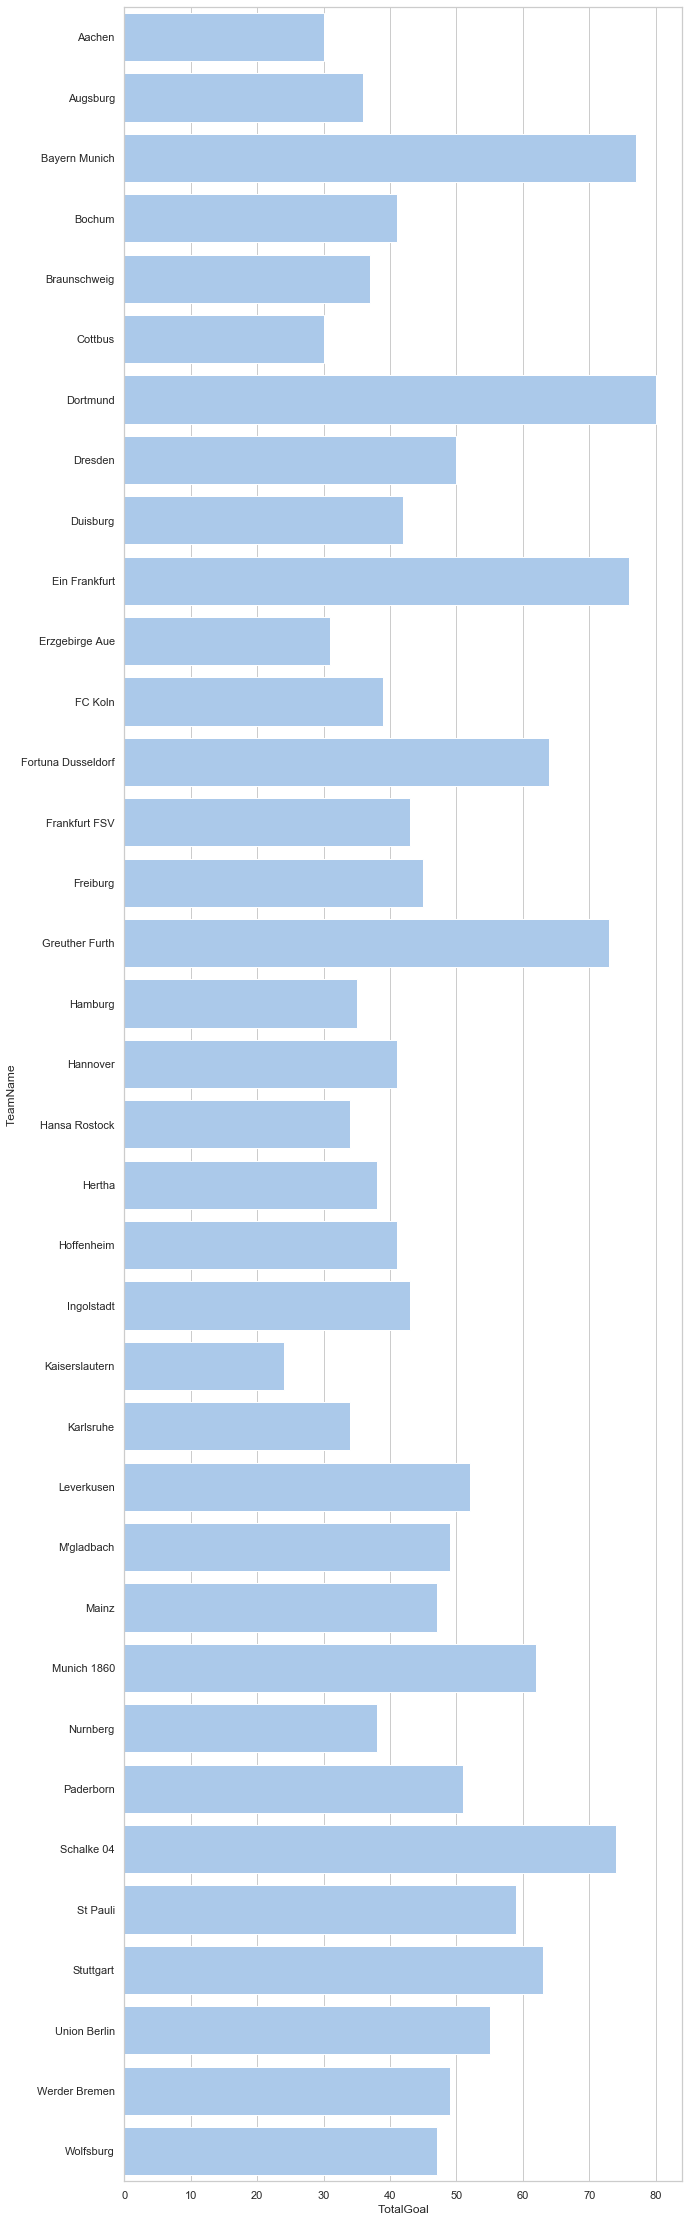

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(10, 40))

# sns.goals.sort_values("Total_Wins", ascending=False)
sns.set_color_codes("pastel")
bar = sns.barplot(x="TotalGoal", y="TeamName", data=goals,
            label="Goals", color="b")

# Data Visualisation Version

Text(0, 0.5, 'Teams')

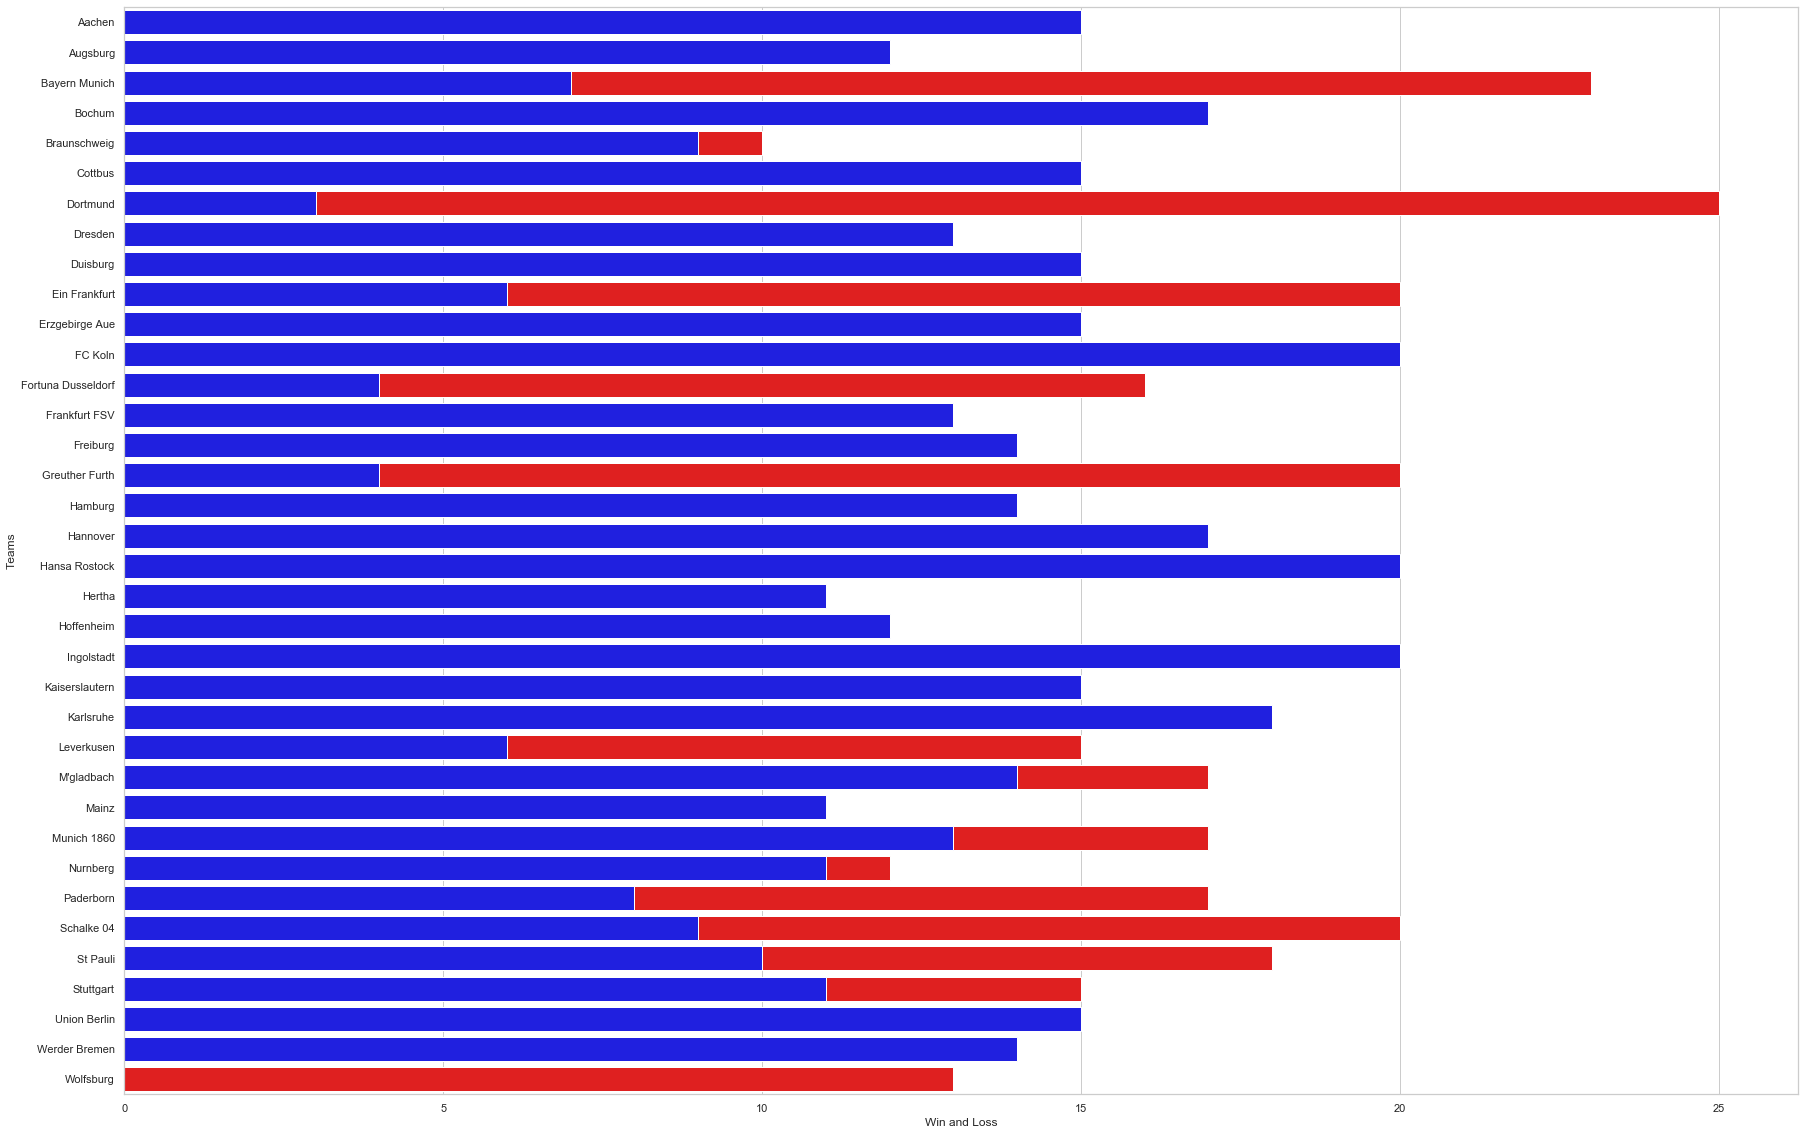

In [27]:
plt.figure(figsize=(30,20))
ax = sns.barplot(x="TotalWins" , y = "TeamName", data=goals , color='red')
ax2 = sns.barplot(x='TotalLosses', y="TeamName", data=goals, color ='blue')
plt.xlabel("Win and Loss")
plt.ylabel("Teams")

# Weather

In [28]:
cur.execute("""Select *
               From Matches
               Where Season = 2011
               AND ((Div = 'D1' OR Div = 'D2'))
;""")
new = pd.DataFrame(cur.fetchall())
new.columns = [x[0] for x in cur.description]
new.head()

Match_ID Div  Season        Date   HomeTeam       AwayTeam  FTHG  FTAG FTR
0      1092  D1    2011  2012-03-31   Nurnberg  Bayern Munich     0     1   A
1      1093  D1    2011  2011-12-11  Stuttgart  Bayern Munich     1     2   A
2      1094  D1    2011  2011-08-13  Wolfsburg  Bayern Munich     0     1   A
3      1095  D1    2011  2011-11-27      Mainz  Bayern Munich     3     2   H
4      1096  D1    2011  2012-02-18   Freiburg  Bayern Munich     0     0   D

In [29]:
Date = goals.Date
print(goals.shape)

(36, 7)


In [30]:
Date = list(goals.Date.unique())
len(Date)

33

In [31]:
import json

def get_keys(path):
    with open(path) as f:
        return json.load(f)

In [32]:
keys = get_keys("/Users/lynguyenova/.secret/dark_sky_api.json")
api_key = keys['api_key']

In [33]:
lat = 52.5200
long = 13.4050

In [34]:
import requests
resp = requests.get(f'https://api.darksky.net/forecast/{api_key}/{lat},{long},2011-05-12T15:00:00')
result = resp.json()
result.keys()

dict_keys(['latitude', 'longitude', 'timezone', 'currently', 'hourly', 'daily', 'flags', 'offset'])

In [35]:
result['daily'].keys()

dict_keys(['data'])

In [36]:
result['daily']['data'][0]['icon']

'rain'

In [37]:
result['daily']['data'][0]['summary']

'Light rain in the evening and overnight.'

In [38]:
result['timezone']

'Europe/Berlin'

In [39]:
for key in result['daily'].keys():
    print(key , type(result['daily'][key]))

data <class 'list'>


In [40]:
#writing the class
class WeatherGetter(object):
    """First initialised using Lat, Long data. By default latitude
    and long is of Berlin. Note there has been some changes in the
    API . Read Detrous/darksky on github. He fixed the summary issue
    a few days ago. Return to his github whenever you have any issues
    """
    def __init__(self, loc =["52.5200", "13.4050"]):
        self.lat = loc[0]
        self.long = loc[1]
        self.url = "https://api.darksky.net/forecast/{}/{},{},{}T12:00:00?exclude=currently,flag"
    def keys(self, path='/Users/lynguyenova/.secret/dark_sky_api.json'):
        with open(path) as f:
            keys = json.load(f)
        return keys['api_key']
    def onDay(self, date):
        api_key = self.keys()
        resp = requests.get(self.url.format(api_key,self.lat,self.long, date))
        result = resp.json()
        try:
            weather = result['daily']['data'][0]['icon']
        except:
            try:
                weather = result['daily']['data'][0]['summary']
            except:
                weather = 'no data'
        return weather
    def for_days(self, datelist):
        weather = []
        for date in datelist:
            weather.append(self.onDay(date))
        return weather
    def test_one(self, date, cond='rain'):
        self.cond = cond
        weather_report = self.onDay(date)
        try:
            if cond in weather_report:
                return True
            else:
                return False
        except:
            return '?'
    def test_many(self, datelist, cond='rain'):
        weather_reports = {}
        for date in datelist:
            weather_reports[date] = self.test_one(date, cond)
        return weather_reports

In [41]:
weather = WeatherGetter()
weather_Report = weather.test_many(Date)

In [42]:
weather_Report

{'2012-03-30': False,
 '2011-11-06': False,
 '2011-11-19': False,
 '2012-03-02': False,
 '2011-10-22': False,
 '2011-07-15': False,
 '2012-04-11': False,
 '2012-02-24': True,
 '2011-08-26': False,
 '2012-03-16': False,
 '2012-04-21': False,
 '2012-05-05': True,
 '2011-11-04': False,
 '2012-05-06': True,
 '2012-02-18': False,
 '2011-08-06': True,
 '2012-02-04': False,
 '2011-10-23': False,
 '2011-12-18': True,
 '2012-03-17': False,
 '2011-10-01': False,
 '2011-09-16': False,
 '2011-08-27': False,
 '2012-03-03': False,
 '2012-01-20': True,
 '2011-11-27': False,
 '2011-10-02': False,
 '2012-03-31': True,
 '2012-02-17': True,
 '2011-09-18': True,
 '2011-12-11': False,
 '2012-02-11': False,
 '2011-08-13': False}

In [43]:
Rainy_day = []
for date in goals.Date:
    Rainy_day.append(weather_Report[date])


In [44]:
goals['Rainy_day'] = Rainy_day

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
goals.head()

Season        Date Div       TeamName  TotalGoal  TotalWins  TotalLosses  \
0    2011  2012-03-30  D2         Aachen         30          6         15.0   
1    2011  2011-11-06  D1       Augsburg         36          8         12.0   
2    2011  2011-11-19  D1  Bayern Munich         77         23          7.0   
3    2011  2012-03-02  D2         Bochum         41         10         17.0   
4    2011  2011-10-22  D2   Braunschweig         37         10          9.0   

   Rainy_day  
0      False  
1      False  
2      False  
3      False  
4      False

In [46]:
goals

Season        Date Div            TeamName  TotalGoal  TotalWins  \
0     2011  2012-03-30  D2              Aachen         30          6   
1     2011  2011-11-06  D1            Augsburg         36          8   
2     2011  2011-11-19  D1       Bayern Munich         77         23   
3     2011  2012-03-02  D2              Bochum         41         10   
4     2011  2011-10-22  D2        Braunschweig         37         10   
5     2011  2011-07-15  D2             Cottbus         30          8   
6     2011  2012-04-11  D1            Dortmund         80         25   
7     2011  2012-02-24  D2             Dresden         50         12   
8     2011  2011-08-26  D2            Duisburg         42         10   
9     2011  2012-03-16  D2       Ein Frankfurt         76         20   
10    2011  2012-04-21  D2      Erzgebirge Aue         31          8   
11    2011  2012-05-05  D1             FC Koln         39          8   
12    2011  2011-11-04  D2  Fortuna Dusseldorf         64         16   
13    2011  2012-05-06  D2       Frankfurt FSV         43          7   
14    2011  2012-02-18  D1            Freiburg         45         10   
15    2011  2011-08-06  D2      Greuther Furth         73         20   
16    2011  2012-02-04  D1             Hamburg         35          8   
17    2011  2011-10-23  D1            Hannover         41         12   
18    2011  2011-12-18  D2       Hansa Rostock         34          5   
19    2011  2012-03-17  D1              Hertha         38          7   
20    2011  2011-10-01  D1          Hoffenheim         41         10   
21    2011  2011-09-16  D2          Ingolstadt         43          8   
22    2011  2011-08-27  D1      Kaiserslautern         24          4   
23    2011  2012-04-11  D2           Karlsruhe         34          9   
24    2011  2012-03-03  D1          Leverkusen         52         15   
25    2011  2012-01-20  D1          M'gladbach         49         17   
26    2011  2011-11-27  D1               Mainz         47          9   
27    2011  2011-10-02  D2         Munich 1860         62         17   
28    2011  2012-03-31  D1            Nurnberg         38         12   
29    2011  2012-02-17  D2           Paderborn         51         17   
30    2011  2011-09-18  D1          Schalke 04         74         20   
31    2011  2011-11-27  D2            St Pauli         59         18   
32    2011  2011-12-11  D1           Stuttgart         63         15   
33    2011  2012-02-11  D2        Union Berlin         55         14   
34    2011  2012-04-21  D1       Werder Bremen         49         11   
35    2011  2011-08-13  D1           Wolfsburg         47         13   

    TotalLosses  Rainy_day  
0          15.0      False  
1          12.0      False  
2           7.0      False  
3          17.0      False  
4           9.0      False  
5          15.0      False  
6           3.0      False  
7          13.0       True  
8          15.0      False  
9           6.0      False  
10         15.0      False  
11         20.0       True  
12          4.0      False  
13         13.0       True  
14         14.0      False  
15          4.0       True  
16         14.0      False  
17         17.0      False  
18         20.0       True  
19         11.0      False  
20         12.0      False  
21         20.0      False  
22         15.0      False  
23         18.0      False  
24          6.0      False  
25         14.0       True  
26         11.0      False  
27         13.0      False  
28         11.0       True  
29          8.0       True  
30          9.0       True  
31         10.0      False  
32         11.0      False  
33         15.0      False  
34         14.0      False  
35          NaN      False

# Percentage of Wins

In [47]:
rain = goals.loc[goals['Rainy_day'] == True]

In [48]:
rain

Season        Date Div        TeamName  TotalGoal  TotalWins  TotalLosses  \
7     2011  2012-02-24  D2         Dresden         50         12         13.0   
11    2011  2012-05-05  D1         FC Koln         39          8         20.0   
13    2011  2012-05-06  D2   Frankfurt FSV         43          7         13.0   
15    2011  2011-08-06  D2  Greuther Furth         73         20          4.0   
18    2011  2011-12-18  D2   Hansa Rostock         34          5         20.0   
25    2011  2012-01-20  D1      M'gladbach         49         17         14.0   
28    2011  2012-03-31  D1        Nurnberg         38         12         11.0   
29    2011  2012-02-17  D2       Paderborn         51         17          8.0   
30    2011  2011-09-18  D1      Schalke 04         74         20          9.0   

    Rainy_day  
7        True  
11       True  
13       True  
15       True  
18       True  
25       True  
28       True  
29       True  
30       True

In [49]:
rain['TotalGames'] = rain['TotalWins'] + rain['TotalLosses']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
rain

Season        Date Div        TeamName  TotalGoal  TotalWins  TotalLosses  \
7     2011  2012-02-24  D2         Dresden         50         12         13.0   
11    2011  2012-05-05  D1         FC Koln         39          8         20.0   
13    2011  2012-05-06  D2   Frankfurt FSV         43          7         13.0   
15    2011  2011-08-06  D2  Greuther Furth         73         20          4.0   
18    2011  2011-12-18  D2   Hansa Rostock         34          5         20.0   
25    2011  2012-01-20  D1      M'gladbach         49         17         14.0   
28    2011  2012-03-31  D1        Nurnberg         38         12         11.0   
29    2011  2012-02-17  D2       Paderborn         51         17          8.0   
30    2011  2011-09-18  D1      Schalke 04         74         20          9.0   

    Rainy_day  TotalGames  
7        True        25.0  
11       True        28.0  
13       True        20.0  
15       True        24.0  
18       True        25.0  
25       True        31.0  
28       True        23.0  
29       True        25.0  
30       True        29.0

In [51]:
rain['WinningPercentage'] = rain['TotalWins']/rain['TotalGames']*100

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
rain

Season        Date Div        TeamName  TotalGoal  TotalWins  TotalLosses  \
7     2011  2012-02-24  D2         Dresden         50         12         13.0   
11    2011  2012-05-05  D1         FC Koln         39          8         20.0   
13    2011  2012-05-06  D2   Frankfurt FSV         43          7         13.0   
15    2011  2011-08-06  D2  Greuther Furth         73         20          4.0   
18    2011  2011-12-18  D2   Hansa Rostock         34          5         20.0   
25    2011  2012-01-20  D1      M'gladbach         49         17         14.0   
28    2011  2012-03-31  D1        Nurnberg         38         12         11.0   
29    2011  2012-02-17  D2       Paderborn         51         17          8.0   
30    2011  2011-09-18  D1      Schalke 04         74         20          9.0   

    Rainy_day  TotalGames  WinningPercentage  
7        True        25.0          48.000000  
11       True        28.0          28.571429  
13       True        20.0          35.000000  
15       True        24.0          83.333333  
18       True        25.0          20.000000  
25       True        31.0          54.838710  
28       True        23.0          52.173913  
29       True        25.0          68.000000  
30       True        29.0          68.965517

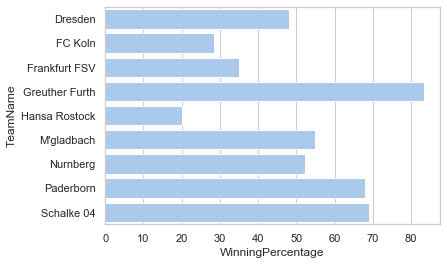

In [53]:
win_rain = sns.barplot(x="WinningPercentage", y="TeamName", data=rain,
            label="WinningPercentage", color="b", capsize=15)

# Mongo

In [55]:
pip install pymongo

     |████████████████████████████████| 358kB 795kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [56]:
import pymongo

In [57]:
from pymongo import MongoClient
client = MongoClient()

In [58]:
client = MongoClient('mongodb://localhost:27017/')

In [59]:
mydb = client['football_database']

In [ ]:
class MongoHandler():
    pass

# Summary

In this lab, we dug deep and used everything we've learned so far about python programming, databases, HTTP requests and API calls to ETL data from a SQL database into a MongoDB instance!